In [1]:
%matplotlib notebook

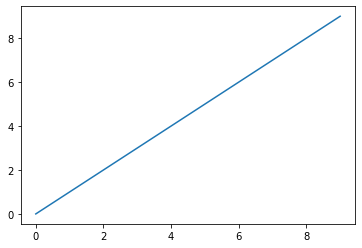

In [45]:
import matplotlib.pyplot as plt
import numpy as np
data = np.arange(10)
plt.plot(data)

### figure和subplot
matplotlib的图像都位于Figure对象中。可以用plt.figure创建一个新的Figure

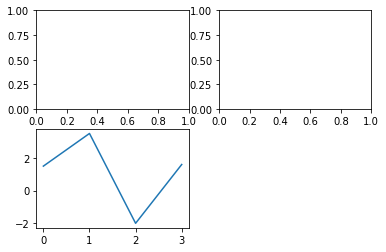

In [40]:

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)#图像是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot([1.5, 3.5, -2, 1.6])#执行该条命令，会在上一个subplot上进行绘图
ax4 = fig.add_subplot(2, 2, 4)
# 由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图了
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# "k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图
ax4.plot(np.random.randn(50).cumsum(), 'k--')

In [43]:
ax4.plot(np.random.randn(50).cumsum(), 'k--')

<font face='黑体' color ='red' size=4>需要注意</font>
<p>在不同的代码块中执行绘图，不会显示图形，它只会在第一次打开图形，在其他事件中，它会进入函数https://stackoverflow.com/questions/5524858/matplotlib-show-doesnt-work-twice

matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A40A198>,
      dtype=object)

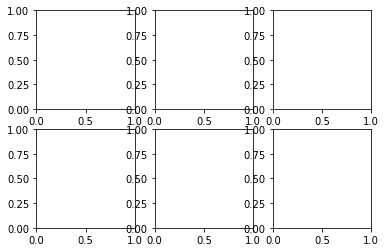

In [44]:
fig, axes = plt.subplots(2, 3)
axes

#### 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果调整了图像大小，间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距。
<p>
   subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
<p>   wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距

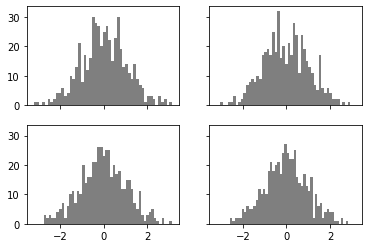

In [58]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)

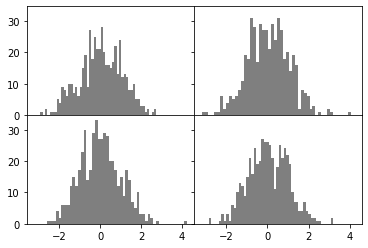

In [57]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)#子图间距设为0

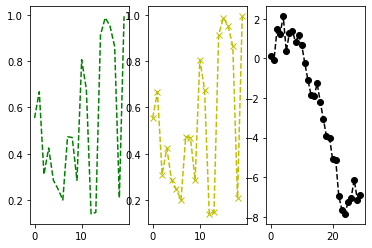

In [84]:
fig ,axes = plt.subplots(1,3)
x = np.random.rand(20)
axes[0].plot(x, 'g--')
axes[1].plot(x, linestyle='--',marker='x', color='y')
# 线图可以使用标记强调数据点
axes[2].plot(np.random.randn(30).cumsum(), 'ko--')#或者写成plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

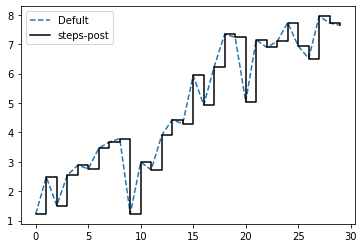

In [88]:
data = np.random.randn(30).cumsum()
plt.plot(data,linestyle='--',label='Defult')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')#创建图例

#### 刻度、标签、图例
pyplot中包含有xlim、xticks、xticklabels等方法，分别控制图表的范围、刻度位置、刻度标签等，使用方式有以下两种：
* 调用不带参数，返回当前的参数值
* 调用带参数，则设置参数
<p>
    <p>这些方法都是对当前或最近创建的AxesSubplot起作用的

#### 设置标题、轴标签、刻度及刻度标签


[Text(0, 0.5, 'ylabel'), Text(0.5, 1.0, 'new plot title')]

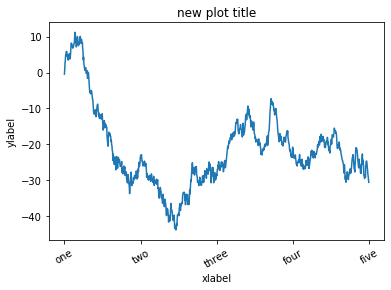

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ax.set_xticks([0,250,500,750,1000])#xticklabels与xticks刻度位置一一对应
ax.set_xticklabels(['one','two','three','four','five'],rotation=30)#rotation选项设定x刻度标签逆时针倾斜30度
ax.set_title('plot title')#设置标题
ax.set_xlabel('xlabel')#x轴名称
# y轴的修改方式与此类似，只需将上述代码中的x替换为y即可。轴的类有集合方法，可以批量设定绘图选项。可以写为：
props ={
    'title':'new plot title',
    'ylabel':'ylabel'
}
ax.set(**props)

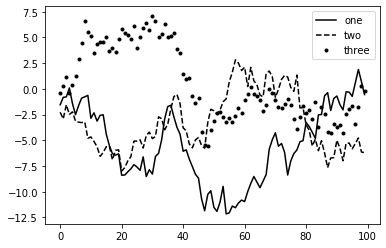

In [110]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(100).cumsum(), 'k', label='one')
ax.plot(np.random.randn(100).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(100).cumsum(), 'k.', label='three')
ax.legend(loc='best')

In [231]:
data = np.random.randn(1000).cumsum()+1000
date_ = pd.date_range(start='2006-01-01',periods=1000,freq='D')
data_ = pd.Series(data,index=date_).reset_index()

KeyError: '2007-10-11'

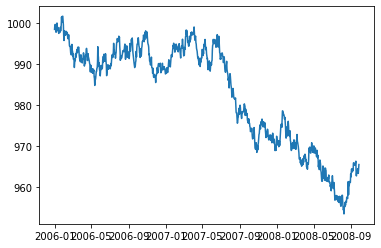

In [242]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data_['index'],data_[0])
crisis_data = [
    ('2007-10-11', 'Peak of bull market'),
    ('2008-03-11', 'Bear Stearns Fails'),
    ('2008-09-15', 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label,xy=(date,data_[date]+75),
                xytext=(date,data_[date]+225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')
plt.xticks(rotation=-30)#如果不是共用轴，就可以设置。现在共用X轴就无法使用xticks的rotation来对x轴标签旋转
ax.set_title('importance dates of financial crisis')

In [219]:
for date, label in crisis_data:
    print(data_[date]+75)

1024.3250306900281
1019.5620565695328
1025.2783316328891


In [222]:
data_.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2008-09-17', '2008-09-18', '2008-09-19', '2008-09-20',
               '2008-09-21', '2008-09-22', '2008-09-23', '2008-09-24',
               '2008-09-25', '2008-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

#### 使用pandas和seaborn绘图

* Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图

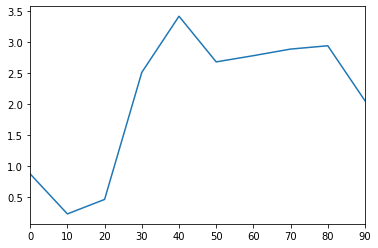

In [4]:
import pandas as pd
import numpy as np
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

In [6]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B','C','D'],index=np.arange(0,100,10))
df

,A,B,C,D
0,-1.298985,-0.260682,0.205847,-1.460537
10,-2.552044,-1.692930,0.746205,0.209703
20,-3.245971,-0.988123,1.674664,-0.553925
30,-2.009712,-1.443265,1.526392,0.363121
40,-2.119605,-1.970299,1.508530,0.103412
50,-2.988873,-1.306283,1.085106,0.327626
60,-1.541339,-0.306821,-0.304051,-0.193622
70,-0.953327,1.437354,0.643860,0.692637
80,-0.499743,-0.210887,1.052473,2.062613
90,0.278087,-0.159059,2.592301,4.571835


- DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例
* plot属性包含一批不同绘图类型的方法。如，df.plot()等价于df.plot.line()

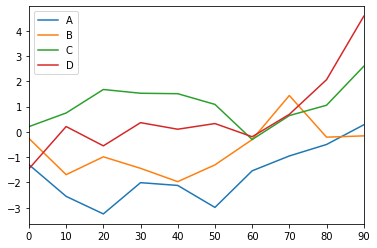

In [7]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BFAA278>,
      dtype=object)

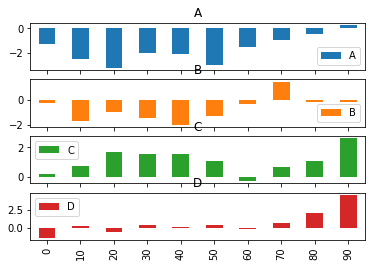

In [20]:
#参数subplots默认为False,标识将各列绘制在同一subplot中，kind表示绘图类型
df.plot(subplots=True,kind='bar')

In [8]:
help(pd.DataFrame.plot)

Help on class FramePlotMethods in module pandas.plotting._core:

class FramePlotMethods(BasePlotMethods)
 |  FramePlotMethods(data)
 |  
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=

#### 柱状图
* plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度

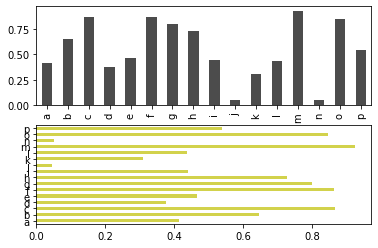

In [27]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)#alpha=0.7设定颜色透明度
data.plot.barh(ax=axes[1],color='y',alpha=0.7)

In [33]:
df = pd.DataFrame(np.random.rand(6,4),index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'],name='genus'))
df

genus,A,B,C,D
one,0.419345,0.383807,0.733757,0.882337
two,0.248762,0.045740,0.571678,0.310600
three,0.896760,0.613349,0.939094,0.654400
four,0.806880,0.720801,0.843401,0.300683
five,0.493158,0.691293,0.074918,0.931429
six,0.985229,0.090913,0.468394,0.181441


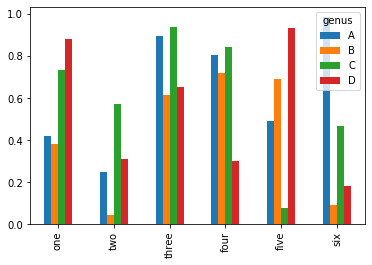

In [39]:
df.plot.bar()#其中列名默认为图例的名称

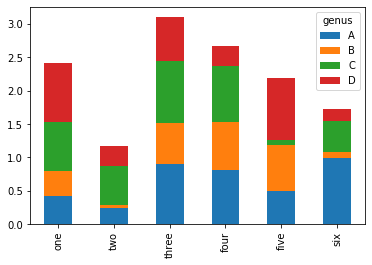

In [40]:
# 设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起
df.plot.bar(stacked=True)

In [41]:
tips = pd.read_csv(r'E:\ML\pydata_2nd_edition\pydata-book-2nd-edition\examples\tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


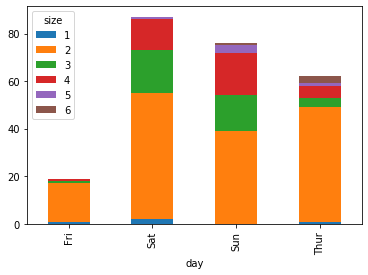

In [56]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts.plot.bar(stacked=True)

如图所示，周末聚会的次数会增加

In [49]:
# 规格化，使得各行的和为1
party_pcts = party_counts.div(party_counts.sum(1),axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


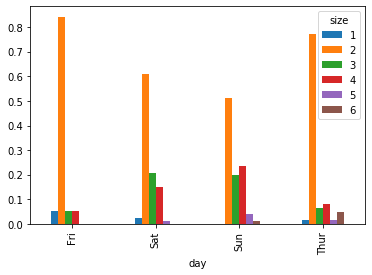

In [52]:
party_pcts.plot.bar()

如图所示，周末聚会的规模会变大，但还是以两人聚会的比例最大

#### 直方图和密度图
- 直方图（histogram）是对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。

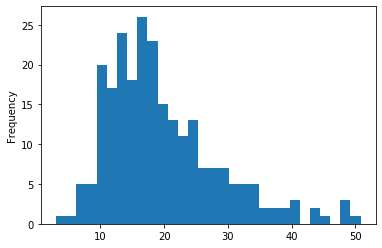

In [61]:
tips['total_bill'].plot.hist(bins=30)

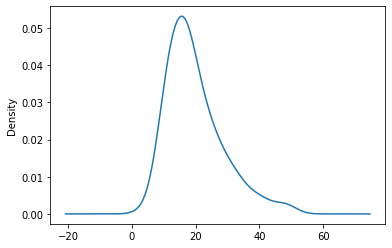

In [62]:
# 密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。使用plot.kde和标准混合正态分布估计即可生成一张密度图
tips['total_bill'].plot.density()

* seaborn的distplot方法可以同时绘制出直方图和核密度图

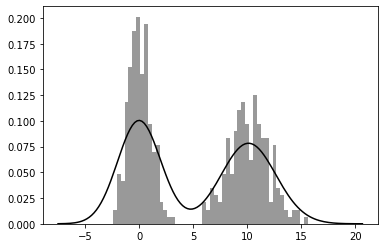

In [63]:
import seaborn as sns
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values,bins=50,color='k')

#### 散点图和点图
* 点图或散布图是观察两个一维数据序列之间的关系的有效手段

In [66]:
macro = pd.read_csv(r'E:\ML\pydata_2nd_edition\pydata-book-2nd-edition\examples\macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [67]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


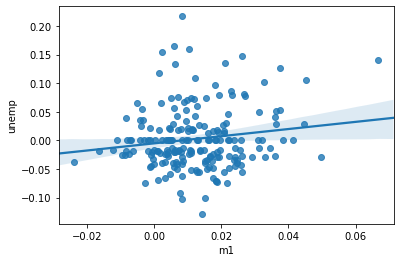

In [68]:
# seaborn的regplot方法作散布图
sns.regplot('m1','unemp',data=trans_data)

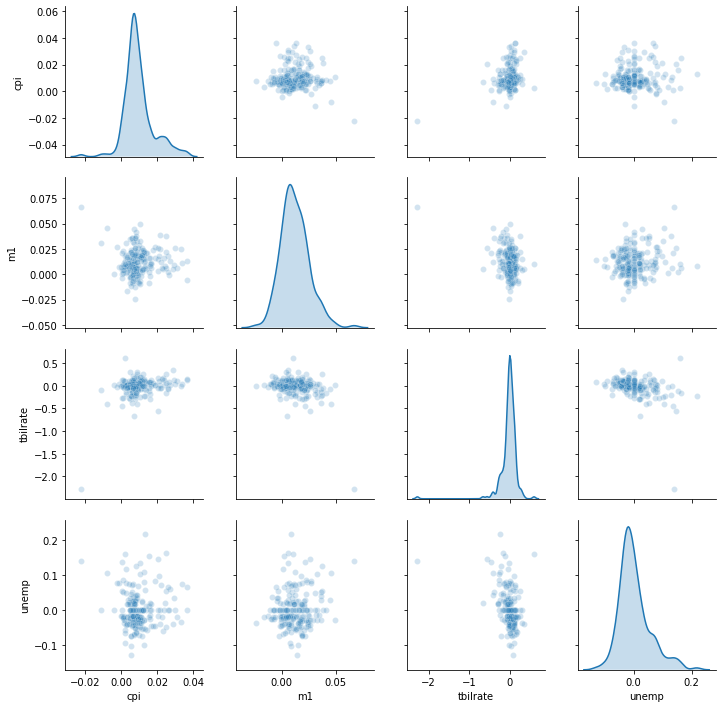

In [69]:
# 散布图矩阵
# plot_kws参数 配置到非对角线元素上的图形使用
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

- 分面网格
factorplot

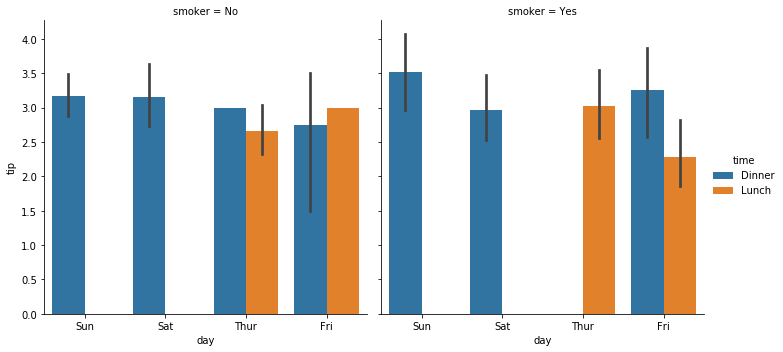

In [74]:
# 每天不同时间吸烟者给小费情况，按smoker分面
sns.factorplot(x='day', y='tip', hue='time', col='smoker',kind='bar', data=tips[tips.tip > 1])

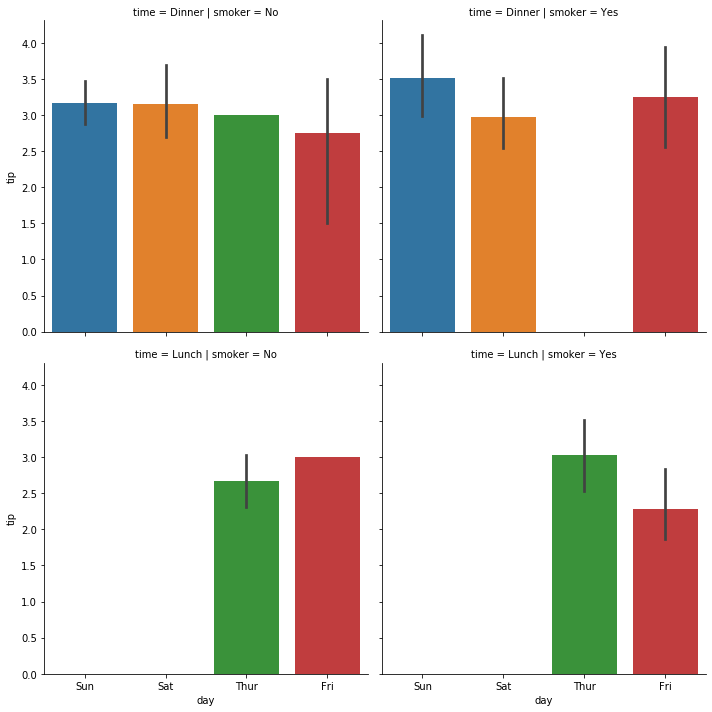

In [76]:
# 通过time/smoker分面
sns.factorplot(x='day', y='tip', row='time', col='smoker', kind='bar', data=tips[tips.tip > 1])

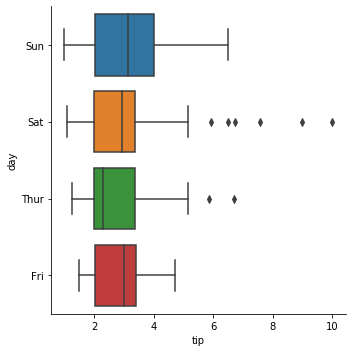

In [77]:
sns.factorplot(x='tip', y='day', kind='box',
                data=tips[tips.tip > 1])

- 使用更通用的seaborn.FacetGrid类，可以创建自己的分面网格。请查阅seaborn的文档（https://seaborn.pydata.org/）

#### 其他python可视化工具
* 工具Boken（https://bokeh.pydata.org/en/latest/） 和Plotly（https://github.com/plotly/plotly.py）， 可以创建动态交互图形，用于网页浏览器。
* 对于创建用于打印或网页的静态图形，默认使用matplotlib和附加的库，比如pandas和seaborn。